In [14]:
import numpy as np

features = np.load('numpy/data_features.npy')
features.shape

(22463, 30, 30, 3)

In [15]:
label = np.load('numpy/data_label.npy')
label.shape

(22463,)

In [16]:
def plot_sample_label(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

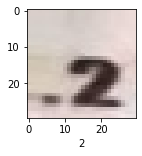

In [22]:
plot_sample_label(features, label, 5768)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=101)

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(11, activation='softmax')
])



cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
527/527 [==============================] - 12s 22ms/step - loss: 1.2644 - accuracy: 0.5836
Epoch 2/20
527/527 [==============================] - 11s 22ms/step - loss: 0.0649 - accuracy: 0.9806
Epoch 3/20
527/527 [==============================] - 12s 23ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 4/20
527/527 [==============================] - 14s 26ms/step - loss: 0.0164 - accuracy: 0.9952
Epoch 5/20
527/527 [==============================] - 13s 24ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 6/20
527/527 [==============================] - 13s 24ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 7/20
527/527 [==============================] - 14s 26ms/step - loss: 0.0050 - accuracy: 0.9988
Epoch 8/20
527/527 [==============================] - 12s 22ms/step - loss: 0.0137 - accuracy: 0.9961
Epoch 9/20
527/527 [==============================] - 12s 22ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 10/20
527/527 [==============================] - 12s 22ms/step - loss: 1.516

In [29]:
cnn.evaluate(x_test,y_test)

176/176 [==============================] - 2s 7ms/step - loss: 8.1900e-04 - accuracy: 0.9996


[0.000819004257209599, 0.999643862247467]

Text(0.5, 42.0, 'Predicted')

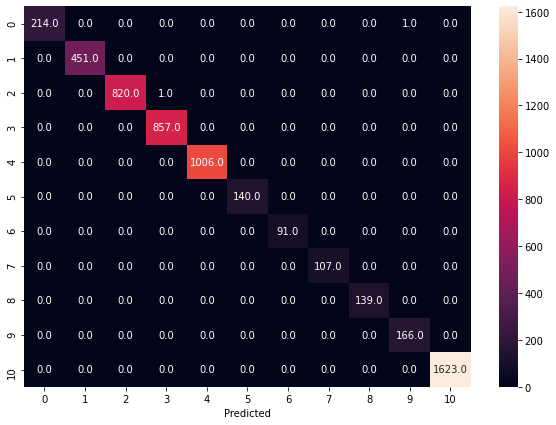

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

y_predicted = cnn.predict(x_test)
y_predicted = np.argmax(y_predicted, axis=1)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       451
           2       1.00      1.00      1.00       821
           3       1.00      1.00      1.00       857
           4       1.00      1.00      1.00      1006
           5       1.00      1.00      1.00       140
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00       107
           8       1.00      1.00      1.00       139
           9       0.99      1.00      1.00       166
          10       1.00      1.00      1.00      1623

    accuracy                           1.00      5616
   macro avg       1.00      1.00      1.00      5616
weighted avg       1.00      1.00      1.00      5616



In [32]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [33]:
cnn.save('models/charachter-plate-new-model.h5')

In [34]:
from tensorflow.keras.models import load_model

test_model = load_model('models/charachter-plate-new-model.h5')
test_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [35]:
classes = ["0","1","2","3","4","5","6","7","8","9","F"]

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predict(img_plot, model):
    plt.figure(figsize = (15,2))
    plt.imshow(img_plot)
    dim = (30,30)
    img_plot = cv.resize(img_plot, dim, interpolation = cv.INTER_AREA)
    img_plot = np.asarray(img_plot).reshape((1, 30, 30, 3))
    plt.xlabel(f'Predict {classes[np.argmax(model.predict(img_plot))]}')
    plt.ylabel(f'Predict {classes[np.argmax(model.predict(img_plot))]}')

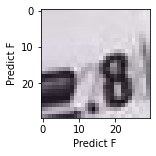

In [38]:
import cv2 as cv
from keras.preprocessing.image import img_to_array

test_image = cv.imread('test/test.jpg')

plot_predict(test_image, test_model)